In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

## __1 - Business Problem__  
___Emp_data -> Build a prediction model for Churn_out_rate___

## __2 - Data collection and description__ 

In [4]:
df = pd.read_csv("C:/Users/Sohail/OneDrive/Data Science/Assignments/Simple Linear Regression/Raw Data/emp_data.csv")

### __Scatter Plot__

In [5]:
x = df['Salary_hike']
y = df['Churn_out_rate']

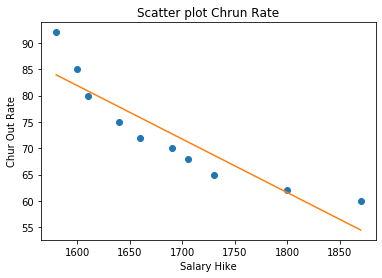

In [6]:
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Chrun Rate')
plt.xlabel('Salary Hike')
plt.ylabel('Chur Out Rate')
plt.show()

As displayed in the scatter plot, the data does contains some outliers, but there is negative correlation between Salary Hike and Churn Out Rate

### __Correlation Analysis__

In [7]:
corr = np.corrcoef(x, y)

Corr  
array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

The correlation between Salary Hike and Churn Out Rate is high (-91%)

## __3 - Regression Model__ 

### __1 - No transformation__ 

In [8]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [9]:
model.summary()

C:\Users\Sohail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              268.5
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    5.22e-08
Time:                        20:10:38   Log-Likelihood:                         -40.025
No. Observations:                  10   AIC:                                      82.05
Df Residuals:                       9   BIC:                                      82.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.0428      0.003     16.387      0.000       0.037       0.049
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.403
Skew:                           0.209   Prob(JB):                        0.818
Kurtosis:                       2.111   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __2 - Log Transformation of X__ 

In [10]:
x_log = np.log(df['Salary_hike'])

In [11]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              459.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    4.92e-09
Time:                        20:12:55   Log-Likelihood:                         -37.406
No. Observations:                  10   AIC:                                      76.81
Df Residuals:                       9   BIC:                                      77.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     9.8024      0.457     21.438      0.000       8.768      10.837
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.652
Skew:                           0.493   Prob(JB):                        0.722
Kurtosis:                       2.231   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __3 - Log Transformation of Y__ 

In [13]:
y_log = np.log(df['Churn_out_rate'])

In [14]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1369.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    3.82e-11
Time:                        20:13:01   Log-Likelihood:                         -3.5804
No. Observations:                  10   AIC:                                      9.161
Df Residuals:                       9   BIC:                                      9.463
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.0025   6.82e-05     36.994      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.455
Skew:                          -0.324   Prob(JB):                        0.796
Kurtosis:                       2.180   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __4 - Log Transformation of X & Y__ 

In [16]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              6563.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    3.37e-14
Time:                        20:13:05   Log-Likelihood:                          4.2320
No. Observations:                  10   AIC:                                     -6.464
Df Residuals:                       9   BIC:                                     -6.161
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.5759      0.007     81.012      0.000       0.560       0.592
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.434
Skew:                           0.181   Prob(JB):                        0.805
Kurtosis:                       2.046   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __5 - Sq Root Transformation of X__ 

In [18]:
x_sqrt = np.sqrt(df['Salary_hike'])

In [19]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              361.3
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    1.42e-08
Time:                        20:13:10   Log-Likelihood:                         -38.584
No. Observations:                  10   AIC:                                      79.17
Df Residuals:                       9   BIC:                                      79.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     1.7679      0.093     19.007      0.000       1.557       1.978
==============================================================================
Omnibus:                        0.481   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.514
Skew:                           0.362   Prob(JB):                        0.774
Kurtosis:                       2.158   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __6 - Square Root Transformation of Y__ 

In [21]:
y_sqrt = np.sqrt(df['Churn_out_rate'])

In [22]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              670.1
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    9.24e-10
Time:                        20:13:14   Log-Likelihood:                         -14.017
No. Observations:                  10   AIC:                                      30.03
Df Residuals:                       9   BIC:                                      30.34
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.0050      0.000     25.886      0.000       0.005       0.005
==============================================================================
Omnibus:                        0.155   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.353
Skew:                          -0.056   Prob(JB):                        0.838
Kurtosis:                       2.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### __7 - Square Root Transformation of X & Y__ 

In [24]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1099.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):                    1.02e-10
Time:                        20:13:18   Log-Likelihood:                         -11.568
No. Observations:                  10   AIC:                                      25.14
Df Residuals:                       9   BIC:                                      25.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.2069      0.006     33.156      0.000       0.193       0.221
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.396
Skew:                           0.146   Prob(JB):                        0.820
Kurtosis:                       2.070   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## __4 - Output Interpretation__ 

We will use Model 4 as it has the best R square value

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == 0.5759  
Thus if the value of Salary Hike is decreased by 1, the predicted value of Chrun Out Rate will increase by 0.57

3 - Adj. R-sqared == 0.998  
Thus the model explains 99.8% of the variance in dependent variable